# Survey Answers After Wednesday Class

Answer choices were:
0. Strongly agree
1. Somewhat agree
2. Neither agree nor disagree
3. Somewhat disagree
4. Strongly disagree

In [2]:
import matplotlib.pyplot as plt
import random
import scipy.stats as st
import pandas as pd
import csv

In [3]:
def findResults(a_list):
    results = []
    strongPositive = 0
    positive = 0
    neutral = 0
    negative = 0
    strongNegative = 0
    for x in a_list:
        if (x == 'Strongly agree'):
            strongPositive = strongPositive + 1
        elif (x == 'Somewhat agree'):
            positive = positive + 1
        elif (x == 'Neither agree nor disagree'):
            neutral = neutral + 1
        elif (x == 'Somewhat disagree'):
            negative = negative + 1
        else:
            strongNegative = strongNegative + 1
    results = [strongPositive, positive, neutral, negative, strongNegative]
    total = sum(results)
    results = [r/total for r in results]
    return results

In [4]:
LIKERT_SCALE = ["Strongly Agree", "Somewhat Agree",
                "Neither Agree nor Disagree",
                "Somewhat Disagree", "Strongly Agree"]

In [6]:
wed_df = pd.read_csv('s18-Wednesday Post-class Survey-anon.csv')
responses = wed_df.iloc[:,7]
responses = responses.str.split(',', expand = True)
wed1 = responses.iloc[:,0].values
wed2 = responses.iloc[:,1].values
wed3 = responses.iloc[:,2].values
wed4 = responses.iloc[:,3].values
wed5 = responses.iloc[:,4].values

final_df = pd.read_csv('f17-Survey_ Final Survey-anon.csv')
final_responses = final_df.iloc[:,10]
final_responses = final_responses.str.split(',', expand = True)
final1 = final_responses.iloc[:,0].values
final2 = final_responses.iloc[:,1].values
final3 = final_responses.iloc[:,2].values
final4 = final_responses.iloc[:,3].values
final5 = final_responses.iloc[:,4].values

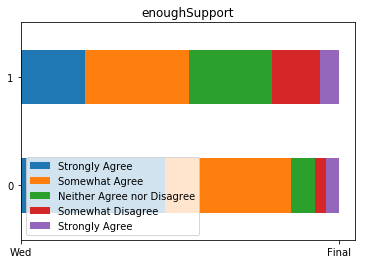

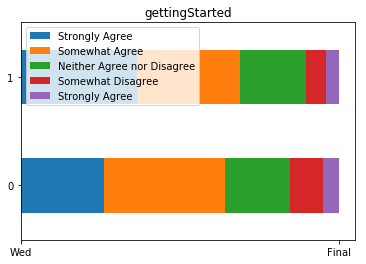

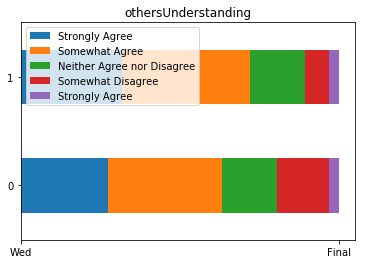

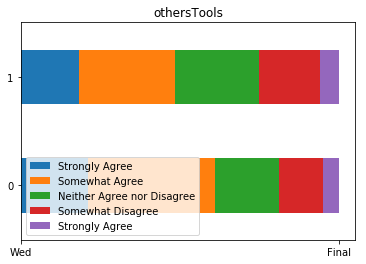

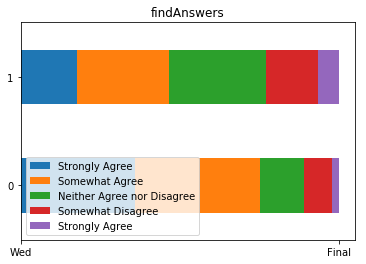

In [11]:
data = [('enoughSupport', wed1, final1),
        ('gettingStarted', wed2, final2),
        ('othersUnderstanding', wed3, final3),
        ('othersTools', wed4, final4),
        ('findAnswers', wed5, final5)
       ]
for (question, wed, final) in data:
    stacked = pd.DataFrame([findResults(wed), findResults(final)], columns=LIKERT_SCALE)
    stacked.plot.barh(stacked=True, )
    plt.xticks([0,1], ["Wed", "Final"])
    plt.title(question)
    plt.show()

    

In [ ]:
def main() :
    firstOne = True
    firstOne2 = True
    skipper = 0
    with open ('/Users/alliesarver/Documents/sophomore year/spring semester/python class/s18-Wednesday Post-class Survey-anon.csv', 'r') as csvfile:
        plots = csv.reader(csvfile, delimiter=',')
        for char in plots:
            index = 0
            for var in char:
                if (index == 7):
                    if (firstOne == True):
                        questions.append(var[72:153])
                        questions.append(var[175:257])
                        questions.append(var[280:368])
                        questions.append(var[395:507])
                        questions.append(var[527:583])
                        firstOne = False
                    else:
                        answers = var.split(',')
                        first.append(answers[0])
                        second.append(answers[1])
                        third.append(answers[2])
                        fourth.append(answers[3])
                        fifth.append(answers[4])
                index = index+1
    with open('/Users/alliesarver/Documents/sophomore year/spring semester/python class/f17-Survey_ Final Survey-anon.csv', 'r') as csvfile2:
        plots2 = csv.reader(csvfile2, delimiter = ',')
        for char2 in plots2:
            index2 = 0;
            for var2 in char2:
                if (index2 == 10):
                    if (firstOne2 == True):
                        firstOne2 = False
                        continue
                    else:
                        if (skipper >= 1):
                            answers2 = var2.split(',')
                            first2.append(answers2[0])
                            second2.append(answers2[1])
                            third2.append(answers2[2])
                            fourth2.append(answers2[3])
                            fifth2.append(answers2[4])
                    skipper = skipper + 1
                index2 = index2 + 1
    makeGraphs()

In [ ]:
AllieAllie